# Modelação de Time Series - LSTM

## Imports

In [29]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


## Leitura

In [30]:
braga_time_series = pd.read_csv('../model/datasets/imputed_data.csv')
braga_time_series.set_index('datetime', inplace=True)
# drop the columns that are not needed: date, time, no2, tempmax, tempmin, solarradiation, solarenergy, uvindex, severerisk, snow


In [31]:
braga_time_series.drop(['date', 'time', 'no2', 'pm1', 'tempmax', 'tempmin', 'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'snow'], axis=1, inplace=True)

braga_time_series.head()

,longitude,latitude,pm10,pm25,temp,feelslike,dew,humidity,precip,windspeed,sealevelpressure,cloudcover,visibility,AQI
datetime,,,,,,,,,,,,,,
2020-01-01 00:00:00,-8.296389,41.449722,15.000000,6.623515,52.8,52.8,48.2,84.5,0.32,16.9,1018.9,93.9,5.3,33.0
2020-01-01 01:00:00,-8.296389,41.449722,15.000000,5.698827,52.8,52.8,48.2,84.5,0.32,16.9,1018.9,93.9,5.3,34.0
2020-01-01 02:00:00,-8.296389,41.449722,15.000000,-2.854534,52.8,52.8,48.2,84.5,0.32,16.9,1018.9,93.9,5.3,45.0
2020-01-01 03:00:00,-8.296389,41.449722,50.228214,8.132993,52.8,52.8,48.2,84.5,0.32,16.9,1018.9,93.9,5.3,44.0
2020-01-01 04:00:00,-8.296389,41.449722,23.558032,8.143355,52.8,52.8,48.2,84.5,0.32,16.9,1018.9,93.9,5.3,34.0


In [32]:
braga_time_series_val = pd.read_csv('../model/datasets/validation_data/datasetsfinal/dataset_final_val.csv')
braga_time_series_val.set_index('datetime', inplace=True)

In [33]:
# drop the columns that are not needed: date, time, no2, tempmax, tempmin, solarradiation, solarenergy, uvindex, severerisk, snow
braga_time_series_val.drop(['pm1', 'name', 'precipprob' , 'preciptype', 'snow', 'snowdepth', 'windgust', 'winddir', 'tempmax', 'tempmin', 'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'conditions', 'icon', 'stations'], axis=1, inplace=True)

braga_time_series_val.head()

,latitude,longitude,pm10,pm25,temp,feelslike,dew,humidity,precip,windspeed,sealevelpressure,cloudcover,visibility,AQI
datetime,,,,,,,,,,,,,,
2023-05-01 00:00:00,41.5549,-8.4067,3.72,1.79,15.0,15.0,13.9,93.01,0.0,12.5,1019.1,0.0,10.0,9.0
2023-05-01 01:00:00,41.5549,-8.4067,4.30,2.04,14.0,14.0,12.9,93.11,0.0,0.4,1019.1,0.0,13.0,11.0
2023-05-01 02:00:00,41.5549,-8.4067,5.21,2.58,13.0,13.0,11.9,92.98,0.0,0.0,1018.2,75.3,10.0,13.0
2023-05-01 03:00:00,41.5549,-8.4067,4.84,2.57,13.0,13.0,11.9,93.20,0.0,0.2,1018.1,2.3,10.0,12.0
2023-05-01 04:00:00,41.5549,-8.4067,4.53,2.38,12.9,12.9,12.8,98.90,0.0,5.2,1018.1,78.3,12.1,11.0


In [34]:
# verificar se ambos os datasets têm as mesmas features
print(set(braga_time_series.columns) == set(braga_time_series_val.columns))

True


## Modelação

In [35]:
train_size = int(len(braga_time_series) * 0.8)  # 80% for training
train_data = braga_time_series[:train_size]
test_data = braga_time_series[train_size:]

In [37]:

X_train = train_data.drop('AQI', axis=1).values
y_train = train_data['AQI'].values
s
X_test = test_data.drop('AQI', axis=1).values
y_test = test_data['AQI'].values

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))


model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')


model.fit(X_train, y_train, epochs=10, batch_size=32)



Epoch 1/10
459/459 [==============================] - 3s 4ms/step - loss: 16814.4980
Epoch 2/10
459/459 [==============================] - 2s 5ms/step - loss: 13964.0400
Epoch 3/10
459/459 [==============================] - 2s 5ms/step - loss: 11714.4717
Epoch 4/10
459/459 [==============================] - 2s 5ms/step - loss: 10134.7930
Epoch 5/10
459/459 [==============================] - 2s 5ms/step - loss: 9192.7158
Epoch 6/10
459/459 [==============================] - 2s 5ms/step - loss: 8584.3242
Epoch 7/10
459/459 [==============================] - 2s 4ms/step - loss: 8142.6436
Epoch 8/10
459/459 [==============================] - 2s 4ms/step - loss: 7769.1201
Epoch 9/10
459/459 [==============================] - 2s 5ms/step - loss: 7258.6191
Epoch 10/10
459/459 [==============================] - 2s 4ms/step - loss: 6614.3057


In [38]:

y_pred = model.predict(X_test)


print(y_pred)


115/115 [==============================] - 0s 2ms/step
[[23.387424]
 [24.682352]
 [26.912994]
 ...
 [62.31157 ]
 [73.93856 ]
 [72.81069 ]]


True
Epoch 1/30
286/286 [==============================] - 29s 95ms/step - loss: 0.1087
Epoch 2/30
286/286 [==============================] - 14s 48ms/step - loss: 0.1077
Epoch 3/30
286/286 [==============================] - 16s 56ms/step - loss: 0.1077
Epoch 4/30
286/286 [==============================] - 21s 72ms/step - loss: 0.1077
Epoch 5/30
286/286 [==============================] - 17s 61ms/step - loss: 0.1077
Epoch 6/30
286/286 [==============================] - 28s 99ms/step - loss: 0.1077
Epoch 7/30
286/286 [==============================] - 46s 160ms/step - loss: 0.1077
Epoch 8/30
286/286 [==============================] - 22s 78ms/step - loss: 0.1077
Epoch 9/30
286/286 [==============================] - 13s 46ms/step - loss: 0.1076
Epoch 10/30
286/286 [==============================] - 12s 43ms/step - loss: 0.1077
Epoch 11/30
286/286 [==============================] - 13s 45ms/step - loss: 0.1076
Epoch 12/30
286/286 [==============================] - 13s 46ms/step - loss: 0.

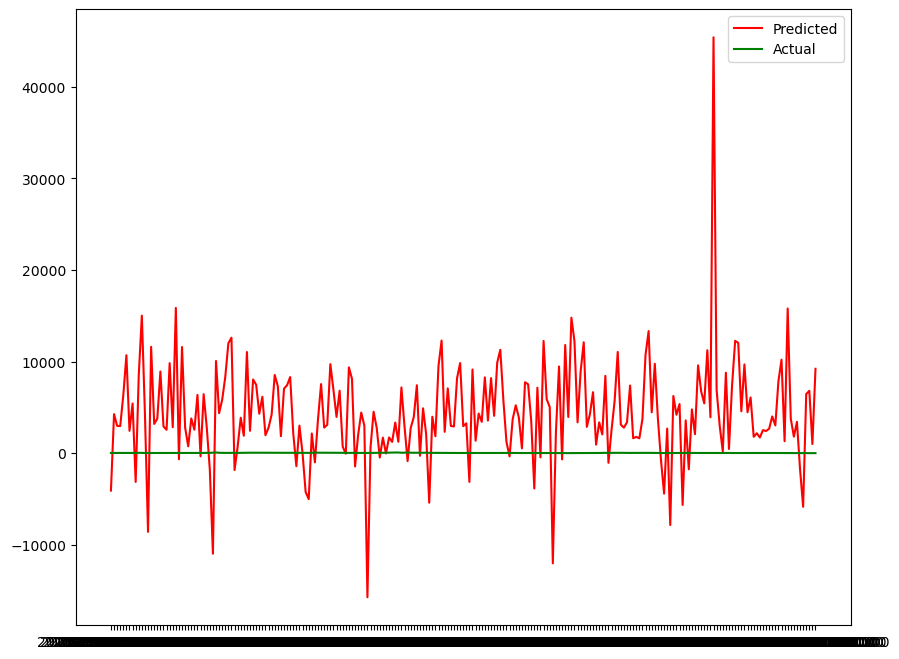

Mean Absolute Error (MAE) :	 5327.4018
Mean Squared Error (MSE) :	 48774395.1508
R-squared Score (R2) :	 -275328.86


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')


braga_time_series = pd.read_csv('../model/datasets/imputed_data.csv')
braga_time_series.set_index('datetime', inplace=True)
braga_time_series.drop(['date', 'time', 'no2', 'pm1', 'tempmax', 'tempmin', 'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'snow'], axis=1, inplace=True)

braga_time_series_val = pd.read_csv('../model/datasets/validation_data/datasetsfinal/dataset_final_val.csv')
braga_time_series_val.set_index('datetime', inplace=True)
braga_time_series_val.drop(['pm1', 'name', 'precipprob', 'preciptype', 'snow', 'snowdepth', 'windgust', 'winddir', 'tempmax', 'tempmin', 'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'conditions', 'icon', 'stations'], axis=1, inplace=True)


print(set(braga_time_series.columns) == set(braga_time_series_val.columns))


window_size = 48


X_train = []
y_train = []
for i in range(window_size, len(braga_time_series_scaled)):
    X_train.append(braga_time_series_scaled[i-window_size:i])
    y_train.append(braga_time_series_scaled[i])
X_train, y_train = np.array(X_train), np.array(y_train)


model = Sequential()
model.add(LSTM(128, activation='relu', input_shape=(window_size, 14)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')


model.fit(X_train, y_train, epochs=30, batch_size=64)


inputs = braga_time_series_val.values
inputs_scaled = scaler.transform(inputs)
X_test = []
for i in range(window_size, len(inputs_scaled)):
    X_test.append(inputs_scaled[i-window_size:i])
X_test = np.array(X_test)

predictions_scaled = model.predict(X_test)


target_scaler = MinMaxScaler()
target_scaler.fit(braga_time_series_val['AQI'].values.reshape(-1, 1))


predictions = target_scaler.inverse_transform(predictions_scaled)


predictions_df = pd.DataFrame({'PREDICTION': predictions.flatten()})


predictions_df.index = braga_time_series_val.index[window_size:]


predictions_df['ACTUAL'] = braga_time_series_val['AQI'].values[window_size:]


print(predictions_df)


plt.figure(figsize=(10, 8))
plt.plot(predictions_df['PREDICTION'], color='red', label='Predicted')
plt.plot(predictions_df['ACTUAL'], color='green', label='Actual')
plt.legend()
plt.show()


metrics = {
    'Mean Absolute Error (MAE)': mean_absolute_error(predictions_df['ACTUAL'], predictions_df['PREDICTION']),
    'Mean Squared Error (MSE)': mean_squared_error(predictions_df['ACTUAL'], predictions_df['PREDICTION']),
    'R-squared Score (R2)': r2_score(predictions_df['ACTUAL'], predictions_df['PREDICTION'])
}

for key, value in metrics.items():
    print(key, ':\t', round(value, 4))


In [24]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import pandas as pd


braga_time_series = pd.read_csv('../model/datasets/imputed_data.csv')
braga_time_series.set_index('datetime', inplace=True)


columns_to_drop = ['date', 'time', 'no2', 'pm1', 'tempmax', 'tempmin', 'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'snow']
braga_time_series.drop(columns_to_drop, axis=1, inplace=True)


braga_time_series_val = pd.read_csv('../model/datasets/validation_data/datasetsfinal/dataset_final_val.csv')
braga_time_series_val.set_index('datetime', inplace=True)

columns_to_drop_val = ['pm1', 'name', 'precipprob', 'preciptype', 'snow', 'snowdepth', 'windgust', 'winddir', 'tempmax', 'tempmin', 'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'conditions', 'icon', 'stations']
braga_time_series_val.drop(columns_to_drop_val, axis=1, inplace=True)

s
print(set(braga_time_series.columns) == set(braga_time_series_val.columns))

X_train = braga_time_series.drop('AQI', axis=1).values
y_train = braga_time_series['AQI'].values
X_val = braga_time_series_val.drop('AQI', axis=1).values
y_val = braga_time_series_val['AQI'].values


X_train_mean = X_train.mean(axis=0)
X_train_std = X_train.std(axis=0)
X_train = (X_train - X_train_mean) / X_train_std
X_val = (X_val - X_train_mean) / X_train_std


X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_val = X_val.reshape((X_val.shape[0], 1, X_val.shape[1]))


model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')


model.fit(X_train, y_train, epochs=10, batch_size=16, validation_data=(X_val, y_val))


predictions = model.predict(X_val)


for i in range(5):
    print("Predicted AQI: {:.2f}, Actual AQI: {:.2f}".format(predictions[i][0], y_val[i]))


True
Epoch 1/10
1146/1146 [==============================] - 15s 12ms/step - loss: 13553.6973 - val_loss: 646.2057
Epoch 2/10
1146/1146 [==============================] - 14s 12ms/step - loss: 9232.9619 - val_loss: 619.8891
Epoch 3/10
1146/1146 [==============================] - 11s 10ms/step - loss: 7619.8701 - val_loss: 602.7266
Epoch 4/10
1146/1146 [==============================] - 13s 11ms/step - loss: 6755.8750 - val_loss: 588.3089
Epoch 5/10
1146/1146 [==============================] - 11s 9ms/step - loss: 5809.8813 - val_loss: 572.1852
Epoch 6/10
1146/1146 [==============================] - 10s 9ms/step - loss: 4823.9697 - val_loss: 556.8955
Epoch 7/10
1146/1146 [==============================] - 11s 10ms/step - loss: 4116.5825 - val_loss: 545.6880
Epoch 8/10
1146/1146 [==============================] - 14s 12ms/step - loss: 3614.7395 - val_loss: 539.6728
Epoch 9/10
1146/1146 [==============================] - 12s 11ms/step - loss: 3187.4026 - val_loss: 535.3342
Epoch 10/10
9/9

Predicted AQI: 3.69, Actual AQI: 9.00
Predicted AQI: 3.69, Actual AQI: 11.00
Predicted AQI: 3.69, Actual AQI: 13.00
Predicted AQI: 3.69, Actual AQI: 12.00
Predicted AQI: 3.69, Actual AQI: 11.00
Predicted AQI: 3.69, Actual AQI: 13.00
Predicted AQI: 3.69, Actual AQI: 13.00
Predicted AQI: 3.69, Actual AQI: 12.00
Predicted AQI: 3.69, Actual AQI: 10.00
Predicted AQI: 3.69, Actual AQI: 10.00
Predicted AQI: 3.69, Actual AQI: 8.00
Predicted AQI: 3.69, Actual AQI: 8.00
Predicted AQI: 3.69, Actual AQI: 8.00
Predicted AQI: 3.69, Actual AQI: 9.00
Predicted AQI: 3.69, Actual AQI: 10.00
Predicted AQI: 3.69, Actual AQI: 9.00
Predicted AQI: 3.69, Actual AQI: 8.00
Predicted AQI: 3.69, Actual AQI: 7.00
Predicted AQI: 3.69, Actual AQI: 8.00
Predicted AQI: 3.69, Actual AQI: 13.00


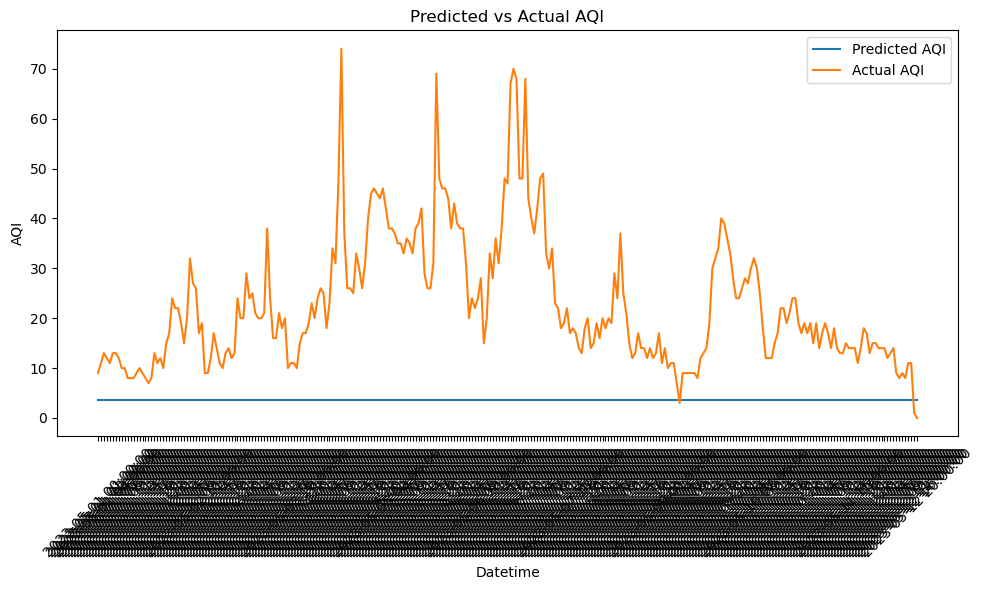

In [28]:
for i in range(20):
    print("Predicted AQI: {:.2f}, Actual AQI: {:.2f}".format(predictions[i][0], y_val[i]))


import matplotlib.pyplot as plt

g
predictions_df = pd.DataFrame(predictions, index=braga_time_series_val.index, columns=['Predicted AQI'])
actual_df = pd.DataFrame(y_val, index=braga_time_series_val.index, columns=['Actual AQI'])

plt.figure(figsize=(10, 6))
plt.plot(predictions_df.index, predictions_df['Predicted AQI'], label='Predicted AQI')
plt.plot(actual_df.index, actual_df['Actual AQI'], label='Actual AQI')
plt.xlabel('Datetime')
plt.ylabel('AQI')
plt.title('Predicted vs Actual AQI')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


True
Epoch 1/2
2292/2292 [==============================] - 18s 7ms/step - loss: 4692.5938 - val_loss: 170.0226
Epoch 2/2
9/9 [==============================] - 1s 3ms/step


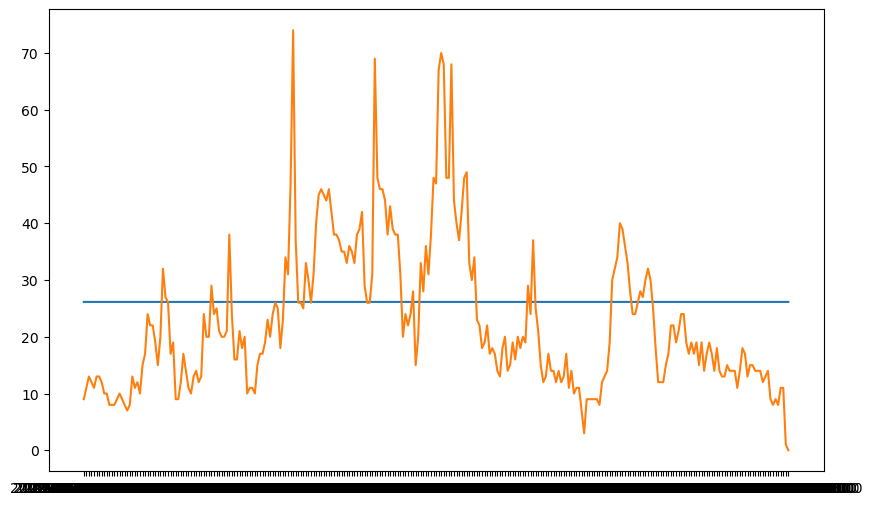

Predicted AQI: 26.14, Actual AQI: 9.00
Predicted AQI: 26.14, Actual AQI: 11.00
Predicted AQI: 26.14, Actual AQI: 13.00
Predicted AQI: 26.14, Actual AQI: 12.00
Predicted AQI: 26.14, Actual AQI: 11.00
Predicted AQI: 26.14, Actual AQI: 13.00
Predicted AQI: 26.14, Actual AQI: 13.00
Predicted AQI: 26.14, Actual AQI: 12.00
Predicted AQI: 26.14, Actual AQI: 10.00
Predicted AQI: 26.14, Actual AQI: 10.00
Predicted AQI: 26.14, Actual AQI: 8.00
Predicted AQI: 26.14, Actual AQI: 8.00
Predicted AQI: 26.14, Actual AQI: 8.00
Predicted AQI: 26.14, Actual AQI: 9.00
Predicted AQI: 26.14, Actual AQI: 10.00
Predicted AQI: 26.14, Actual AQI: 9.00
Predicted AQI: 26.14, Actual AQI: 8.00
Predicted AQI: 26.14, Actual AQI: 7.00
Predicted AQI: 26.14, Actual AQI: 8.00
Predicted AQI: 26.14, Actual AQI: 13.00


In [12]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras import optimizers
import pandas as pd
import matplotlib.pyplot as plt

# Load and preprocess the training dataset
braga_time_series = pd.read_csv('../model/datasets/imputed_data.csv')
braga_time_series.set_index('datetime', inplace=True)

# Drop the columns that are not needed
columns_to_drop = ['date', 'time', 'no2', 'pm1', 'tempmax', 'tempmin', 'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'snow']
braga_time_series.drop(columns_to_drop, axis=1, inplace=True)

# Load and preprocess the validation dataset
braga_time_series_val = pd.read_csv('../model/datasets/validation_data/datasetsfinal/dataset_final_val.csv')
braga_time_series_val.set_index('datetime', inplace=True)

# Drop the columns that are not needed
columns_to_drop_val = ['pm1', 'name', 'precipprob', 'preciptype', 'snow', 'snowdepth', 'windgust', 'winddir', 'tempmax', 'tempmin', 'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'conditions', 'icon', 'stations']
braga_time_series_val.drop(columns_to_drop_val, axis=1, inplace=True)

# Verify if both datasets have the same features
print(set(braga_time_series.columns) == set(braga_time_series_val.columns))

# Define the training and validation data
X_train = braga_time_series.drop('AQI', axis=1).values
y_train = braga_time_series['AQI'].values
X_val = braga_time_series_val.drop('AQI', axis=1).values
y_val = braga_time_series_val['AQI'].values

# Normalize the data
X_train_mean = X_train.mean(axis=0)
X_train_std = X_train.std(axis=0)
X_train = (X_train - X_train_mean) / X_train_std
X_val = (X_val - X_train_mean) / X_train_std

# Reshape the input data for LSTM
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_val = X_val.reshape((X_val.shape[0], 1, X_val.shape[1]))


model = Sequential()
model.add(LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(LSTM(64))
model.add(Dense(1))


# Define the LSTM model

model.compile(loss='mean_squared_error', optimizer=optimizers.Adam(learning_rate=0.01))

# Train the model
model.fit(X_train, y_train, epochs=2, batch_size=8, validation_data=(X_val, y_val))

# Make predictions
predictions = model.predict(X_val)


predictions_df = pd.DataFrame(predictions, index=braga_time_series_val.index, columns=['Predicted AQI'])
actual_df = pd.DataFrame(y_val, index=braga_time_series_val.index, columns=['Actual AQI'])


plt.figure(figsize=(10, 6))
plt.plot(predictions_df.index, predictions_df['Predicted AQI'], label='Predicted AQI')
plt.plot(actual_df.index, actual_df['Actual AQI'], label='Actual AQI')
plt.show()

for i in range(20):
    print("Predicted AQI: {:.2f}, Actual AQI: {:.2f}".format(predictions[i][0], y_val[i]))

